In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("HRDataset_v9.csv")
data.head()

,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,...,10/27/2008,3317,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,...,1/6/2014,1420,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,...,9/29/2014,1154,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,...,2/16/2015,58,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,...,5/1/2015,940,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [3]:
data.shape

(310, 28)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 28 columns):
Employee Name          310 non-null object
Employee Number        310 non-null int64
MarriedID              310 non-null int64
MaritalStatusID        310 non-null int64
GenderID               310 non-null int64
EmpStatus_ID           310 non-null int64
DeptID                 310 non-null int64
Perf_ScoreID           310 non-null int64
Age                    310 non-null int64
Pay Rate               310 non-null float64
State                  310 non-null object
Zip                    310 non-null int64
DOB                    310 non-null object
Sex                    310 non-null object
MaritalDesc            310 non-null object
CitizenDesc            310 non-null object
Hispanic/Latino        310 non-null object
RaceDesc               310 non-null object
Date of Hire           310 non-null object
Days Employed          310 non-null int64
Date of Termination    103 non-null object
R

In [5]:
data.isnull().sum()

Employee Name            0
Employee Number          0
MarriedID                0
MaritalStatusID          0
GenderID                 0
EmpStatus_ID             0
DeptID                   0
Perf_ScoreID             0
Age                      0
Pay Rate                 0
State                    0
Zip                      0
DOB                      0
Sex                      0
MaritalDesc              0
CitizenDesc              0
Hispanic/Latino          0
RaceDesc                 0
Date of Hire             0
Days Employed            0
Date of Termination    207
Reason For Term          0
Employment Status        0
Department               0
Position                 0
Manager Name             0
Employee Source          0
Performance Score        0
dtype: int64

In [6]:
data['Date of Termination'] = data['Date of Termination'].fillna("None")

In [7]:
data["Performance Score"].unique()

array(['Fully Meets', 'N/A- too early to review', '90-day meets',
       'Exceptional', 'Needs Improvement', 'Exceeds', 'PIP'], dtype=object)

In [8]:
data['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
data["Sex"].value_counts()

Female    177
Male      133
Name: Sex, dtype: int64

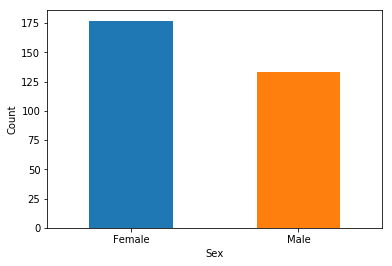

In [10]:
data["Sex"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [11]:
data.groupby(['Department'])["Sex"].value_counts()

Department            Sex   
Admin Offices         Female      6
                      Male        4
Executive Office      Female      1
IT/IS                 Male       28
                      Female     22
Production            Female    127
                      Male       81
Sales                 Male       16
                      Female     15
Software Engineering  Female      6
                      Male        4
Name: Sex, dtype: int64

In [12]:
data["Employment Status"].value_counts()

Active                    183
Voluntarily Terminated     88
Terminated for Cause       14
Leave of Absence           14
Future Start               11
Name: Employment Status, dtype: int64

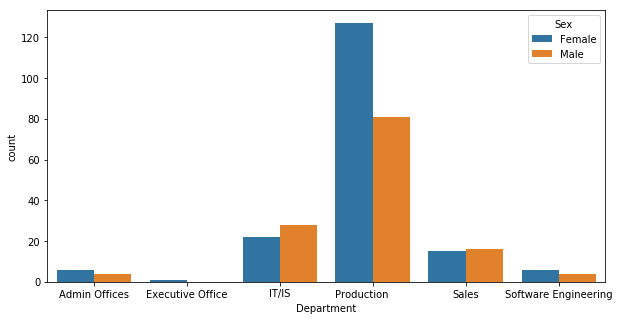

In [13]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=data['Department'],hue=data['Sex'])

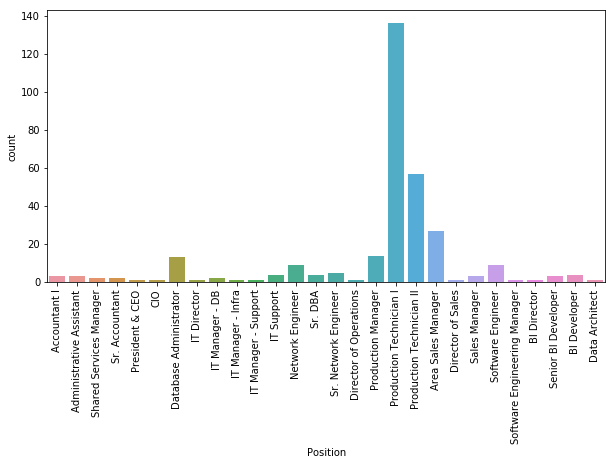

In [14]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=data['Position'])
plt.xticks(rotation=90)
plt.show()


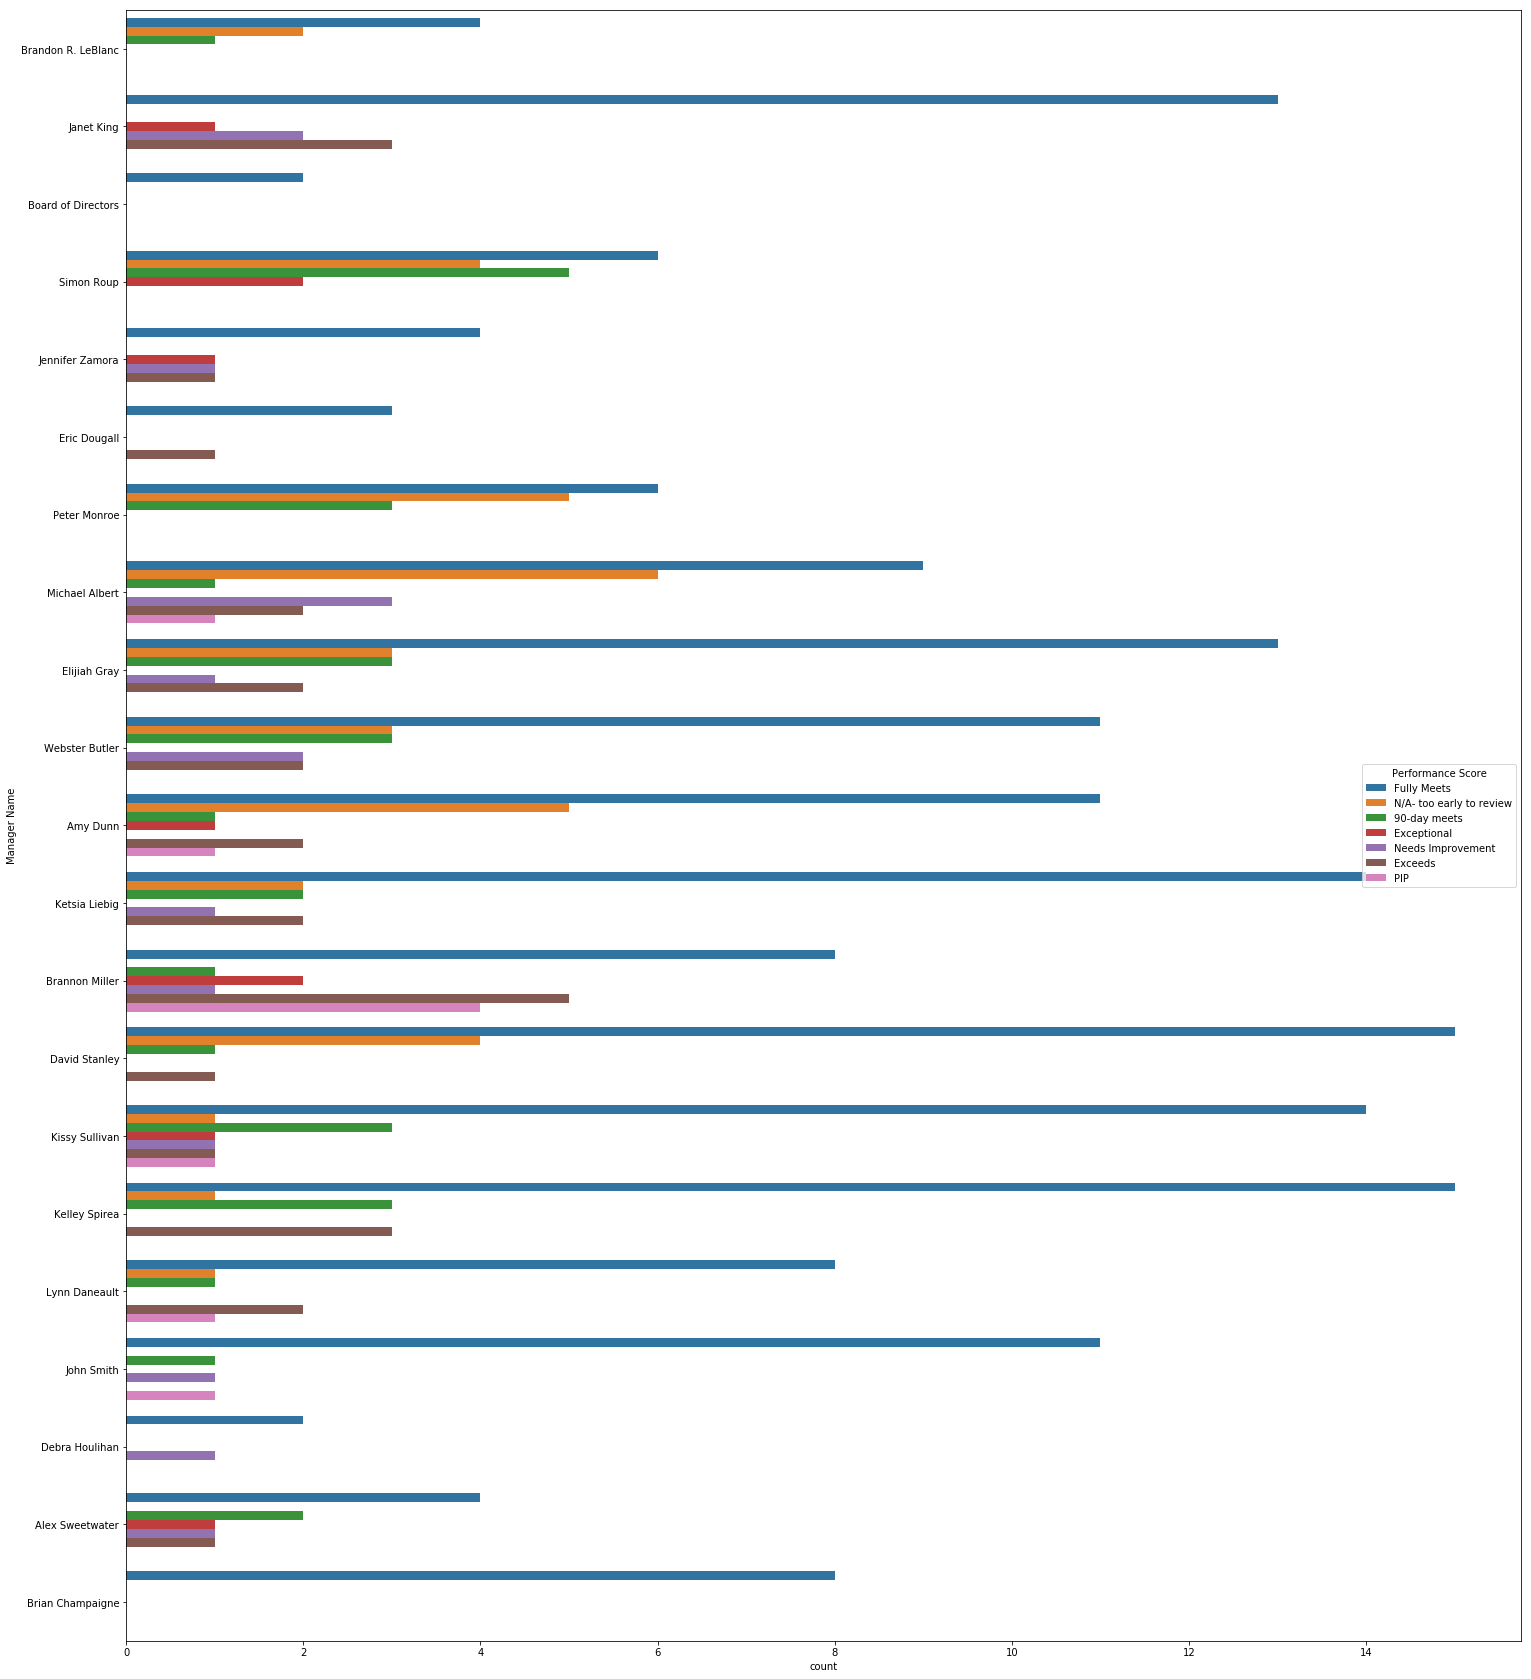

In [15]:
plt.figure(figsize=(25,30))
sns.countplot(y=data['Manager Name'], hue=data['Performance Score'])

Which department pays more?

In [16]:
data.groupby(['Department'])['Pay Rate'].sum()

Department
Admin Offices            318.96
Executive Office          80.00
IT/IS                   2289.48
Production              4801.95
Sales                   1721.25
Software Engineering     486.65
Name: Pay Rate, dtype: float64

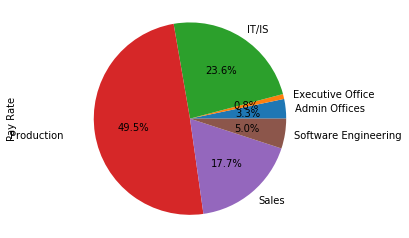

In [17]:
data.groupby(['Department'])['Pay Rate'].sum().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

 The number of employees more in Production dept. Sum of pay rate is also more in production department.

Who gets the highest salary ? 

In [18]:
id_of_person_with_highgest_pay = data['Pay Rate'].idxmax()
data.loc[id_of_person_with_highgest_pay]


data.loc[data['Pay Rate'].idxmax()]

Employee Name                     King, Janet
Employee Number                    1001495124
MarriedID                                   1
MaritalStatusID                             1
GenderID                                    0
EmpStatus_ID                                1
DeptID                                      2
Perf_ScoreID                                3
Age                                        63
Pay Rate                                   80
State                                      MA
Zip                                      1902
DOB                                 9/21/1954
Sex                                    Female
MaritalDesc                           Married
CitizenDesc                        US Citizen
Hispanic/Latino                           Yes
RaceDesc                                White
Date of Hire                         7/2/2012
Days Employed                            1973
Date of Termination                      None
Reason For Term          N/A - sti

In [19]:
data.columns

Index(['Employee Name', 'Employee Number', 'MarriedID', 'MaritalStatusID',
       'GenderID', 'EmpStatus_ID', 'DeptID', 'Perf_ScoreID', 'Age', 'Pay Rate',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'Hispanic/Latino', 'RaceDesc', 'Date of Hire', 'Days Employed',
       'Date of Termination', 'Reason For Term', 'Employment Status',
       'Department', 'Position', 'Manager Name', 'Employee Source',
       'Performance Score'],
      dtype='object')

In [20]:
data.head()

,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,...,10/27/2008,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,...,1/6/2014,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,...,9/29/2014,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,...,2/16/2015,58,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,...,5/1/2015,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [21]:
data1=data.drop(["DOB",'Employee Name','Employee Number','Date of Hire','Days Employed','Date of Termination','Reason For Term','Manager Name'],axis=1)
data1.shape

(310, 20)

In [22]:
s=data1.select_dtypes(include=['object'])
s

,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Employment Status,Department,Position,Employee Source,Performance Score
0,MA,Female,Married,US Citizen,No,Black or African American,Active,Admin Offices,Accountant I,Diversity Job Fair,Fully Meets
1,MA,Male,Divorced,US Citizen,No,Black or African American,Active,Admin Offices,Accountant I,Website Banner Ads,Fully Meets
2,MA,Male,Single,US Citizen,No,White,Active,Admin Offices,Accountant I,Internet Search,Fully Meets
3,MA,Female,Married,US Citizen,No,White,Active,Admin Offices,Administrative Assistant,Pay Per Click - Google,N/A- too early to review
4,MA,Female,Single,US Citizen,No,White,Active,Admin Offices,Administrative Assistant,Website Banner Ads,N/A- too early to review
5,MA,Female,Married,US Citizen,No,Asian,Voluntarily Terminated,Admin Offices,Administrative Assistant,Diversity Job Fair,Fully Meets
6,MA,Male,Married,US Citizen,No,White,Active,Admin Offices,Shared Services Manager,Monster.com,Fully Meets
7,MA,Male,Married,Eligible NonCitizen,No,Black or African American,Voluntarily Terminated,Admin Offices,Shared Services Manager,Diversity Job Fair,Fully Meets
8,MA,Female,Married,US Citizen,No,Asian,Active,Admin Offices,Sr. Accountant,Diversity Job Fair,90-day meets
9,MA,Female,Married,US Citizen,no,White,Active,Admin Offices,Sr. Accountant,Other,Fully Meets


In [23]:
i=data1.select_dtypes(include=['integer'])
i.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Zip
0,1,1,0,1,1,3,30,1450
1,0,2,1,1,1,3,34,1460
2,0,0,1,1,1,3,31,2703
3,1,1,0,1,1,9,32,2170
4,0,0,0,1,1,9,30,2330


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label=LabelEncoder()
data2=s.apply(label.fit_transform)

In [26]:
features=i.join(data2)
features.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Zip,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Employment Status,Department,Position,Employee Source,Performance Score
0,1,1,0,1,1,3,30,1450,10,0,1,2,0,2,0,0,0,3,3
1,0,2,1,1,1,3,34,1460,10,1,0,2,0,2,0,0,0,21,3
2,0,0,1,1,1,3,31,2703,10,1,3,2,0,5,0,0,0,8,3
3,1,1,0,1,1,9,32,2170,10,0,1,2,0,5,0,0,1,16,4
4,0,0,0,1,1,9,30,2330,10,0,3,2,0,5,0,0,1,21,4


In [27]:
X=features.drop(["Performance Score"],axis=1)
Y=features["Performance Score"]

In [28]:
Y.value_counts()

3    181
4     37
0     31
1     28
5     15
6      9
2      9
Name: Performance Score, dtype: int64

### Handling Imblance data 

#### Random Under-Sampling
Random Undersampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.


#### Random Over-Sampling
Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

#### Synthetic Minority Over-sampling Technique
This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_sm,y_sm= sm.fit_sample(X,Y)

In [30]:
y1=pd.Series(y_sm)
y1.value_counts()

6    181
5    181
4    181
3    181
2    181
1    181
0    181
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

### NaiveBayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb=GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB(priors=None)

In [34]:
nb_pred=nb.predict(xtest)
nb_pred

array([4, 0, 5, 3, 6, 5, 6, 2, 0, 2, 3, 6, 5, 0, 2, 6, 5, 2, 5, 3, 6, 0,
       5, 5, 1, 2, 4, 0, 2, 4, 0, 0, 0, 5, 1, 5, 2, 3, 5, 3, 4, 1, 4, 3,
       6, 0, 5, 3, 6, 3, 2, 2, 2, 3, 5, 4, 0, 6, 0, 6, 4, 4, 3, 4, 6, 5,
       5, 0, 0, 0, 5, 6, 5, 0, 5, 4, 6, 5, 0, 0, 5, 2, 6, 2, 0, 5, 5, 1,
       0, 4, 1, 0, 6, 2, 5, 4, 5, 5, 2, 2, 6, 0, 1, 0, 4, 5, 1, 3, 1, 6,
       0, 5, 4, 6, 4, 6, 1, 5, 2, 5, 4, 0, 5, 4, 5, 3, 0, 4, 5, 4, 0, 2,
       6, 6, 5, 2, 5, 1, 2, 1, 2, 4, 1, 2, 0, 3, 1, 3, 6, 6, 5, 2, 1, 0,
       6, 4, 5, 1, 6, 4, 5, 0, 5, 6, 0, 4, 1, 0, 4, 5, 6, 0, 2, 2, 4, 4,
       6, 6, 6, 5, 0, 4, 1, 5, 2, 6, 3, 0, 0, 4, 5, 1, 5, 0, 1, 6, 4, 0,
       5, 4, 6, 5, 1, 2, 5, 6, 0, 5, 0, 4, 5, 5, 4, 6, 5, 1, 0, 6, 4, 5,
       1, 5, 1, 5, 4, 3, 6, 1, 1, 4, 0, 2, 3, 2, 4, 1, 1, 4, 3, 1, 5, 5,
       5, 2, 1, 1, 1, 3, 6, 0, 5, 2, 6, 2], dtype=int64)

In [35]:
score1=nb.score(xtest,ytest)
score1

0.8622047244094488

In [36]:
score2=nb.score(xtrain,ytrain)
score2

0.8440276406712734

### Confusion Matrix

In [37]:
confusion_matrix=pd.crosstab(ytest,nb_pred)
confusion_matrix

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,36,0,0,0,0,0,5
1,0,29,5,1,0,0,0
2,0,0,26,0,0,0,0
3,0,2,0,18,0,10,0
4,0,0,0,0,37,0,0
5,0,0,0,0,0,42,2
6,6,0,0,0,0,4,31


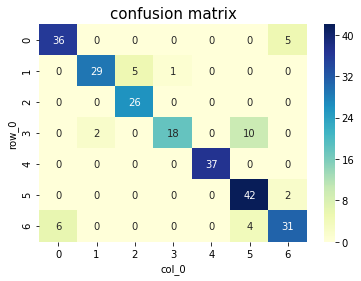

In [38]:
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion matrix",fontsize=15)
plt.show()

### K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
prediction=knn.predict(xtest)
prediction

array([4, 0, 5, 2, 6, 2, 5, 3, 3, 5, 1, 6, 5, 0, 2, 6, 5, 2, 5, 3, 6, 0,
       5, 5, 1, 2, 4, 0, 2, 4, 6, 0, 6, 1, 1, 5, 1, 3, 5, 3, 4, 5, 4, 6,
       6, 0, 5, 3, 0, 2, 3, 2, 2, 6, 5, 4, 0, 6, 6, 2, 4, 4, 3, 4, 6, 5,
       5, 0, 6, 0, 5, 2, 5, 0, 6, 4, 6, 5, 0, 0, 2, 2, 5, 2, 3, 0, 6, 1,
       6, 4, 1, 0, 5, 2, 5, 4, 6, 1, 2, 2, 5, 0, 1, 0, 4, 5, 1, 0, 5, 5,
       3, 3, 4, 5, 4, 6, 2, 3, 5, 6, 4, 0, 5, 4, 5, 3, 0, 4, 5, 4, 0, 2,
       6, 6, 0, 4, 5, 5, 2, 1, 6, 4, 1, 2, 0, 3, 1, 5, 6, 6, 0, 2, 1, 0,
       1, 4, 5, 0, 6, 1, 1, 0, 5, 6, 5, 4, 6, 5, 4, 5, 6, 0, 2, 2, 2, 4,
       6, 3, 2, 0, 3, 4, 1, 5, 2, 5, 1, 0, 0, 4, 3, 0, 5, 0, 1, 6, 4, 6,
       5, 3, 6, 5, 2, 1, 2, 0, 0, 0, 0, 4, 5, 5, 4, 1, 2, 1, 0, 6, 2, 5,
       1, 0, 3, 0, 4, 4, 6, 5, 1, 4, 5, 2, 3, 1, 1, 1, 6, 4, 1, 0, 6, 6,
       1, 2, 1, 1, 1, 3, 6, 0, 5, 2, 6, 2], dtype=int64)

In [42]:
knn_score1=knn.score(xtrain,ytrain)
knn_score1

1.0

In [43]:
knn.score2=knn.score(xtest,ytest)
knn.score2

0.6811023622047244

In [44]:
confusion_matrix1=pd.crosstab(ytest,prediction)
confusion_matrix1

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,29,0,0,3,0,5,4
1,3,22,2,1,0,4,3
2,0,0,22,1,1,2,0
3,6,3,2,12,1,4,2
4,0,2,2,1,32,0,0
5,1,4,5,1,0,29,4
6,3,2,2,2,0,5,27


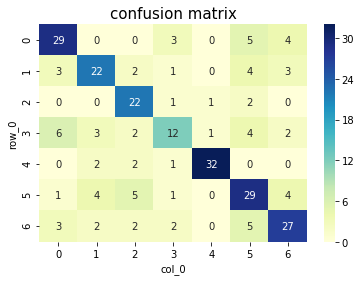

In [45]:
sns.heatmap(confusion_matrix1,annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion matrix",fontsize=15)
plt.show()

### DecisionTreeClassifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
ypred=model.predict(xtest)
ypred

array([4, 0, 5, 3, 6, 5, 6, 1, 0, 2, 3, 6, 5, 0, 2, 6, 3, 2, 5, 3, 0, 0,
       5, 5, 1, 2, 4, 0, 2, 4, 0, 0, 6, 5, 1, 5, 1, 3, 5, 3, 4, 1, 4, 1,
       6, 0, 3, 3, 6, 3, 2, 2, 2, 3, 5, 4, 0, 6, 6, 6, 4, 4, 3, 4, 0, 5,
       5, 0, 6, 0, 3, 6, 5, 0, 5, 4, 6, 5, 0, 0, 5, 2, 6, 2, 6, 3, 6, 1,
       6, 4, 1, 0, 6, 2, 5, 4, 5, 5, 2, 2, 0, 0, 1, 0, 4, 5, 1, 3, 1, 6,
       0, 3, 4, 6, 4, 6, 1, 3, 2, 5, 4, 0, 5, 4, 5, 3, 0, 4, 5, 4, 0, 2,
       6, 0, 3, 2, 5, 1, 2, 1, 1, 4, 1, 2, 0, 3, 1, 3, 6, 6, 3, 2, 1, 0,
       6, 4, 5, 1, 6, 4, 5, 0, 5, 6, 0, 4, 3, 0, 4, 5, 6, 0, 2, 2, 4, 4,
       6, 6, 5, 3, 0, 4, 1, 5, 2, 0, 3, 0, 0, 4, 5, 1, 5, 0, 1, 6, 4, 6,
       5, 4, 6, 5, 1, 1, 5, 5, 0, 6, 0, 4, 5, 5, 4, 6, 5, 1, 0, 6, 4, 5,
       1, 3, 3, 6, 4, 3, 6, 1, 1, 4, 0, 2, 3, 1, 4, 1, 1, 4, 3, 1, 5, 6,
       5, 2, 1, 1, 1, 3, 6, 0, 5, 2, 6, 2], dtype=int64)

In [49]:
tr_score=model.score(xtrain,ytrain)
tr_score

1.0

In [50]:
ts_score=model.score(xtest,ytest)
ts_score

1.0

In [51]:
confusion_matrix2=pd.crosstab(ytest,ypred)
confusion_matrix2

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,41,0,0,0,0,0,0
1,0,35,0,0,0,0,0
2,0,0,26,0,0,0,0
3,0,0,0,30,0,0,0
4,0,0,0,0,37,0,0
5,0,0,0,0,0,44,0
6,0,0,0,0,0,0,41


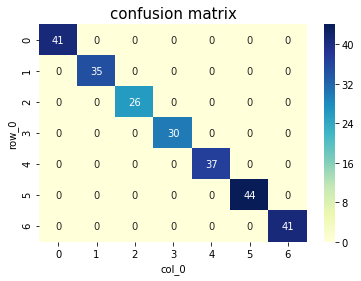

In [52]:
sns.heatmap(confusion_matrix2,annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion matrix",fontsize=15)
plt.show()

In [54]:
final_score=pd.DataFrame({"Models":["Naivebayes","KNN","Decisiontree"],"Score":[score1,knn.score2,ts_score]})

final_score

,Models,Score
0,Naivebayes,0.862205
1,KNN,0.681102
2,Decisiontree,1.000000


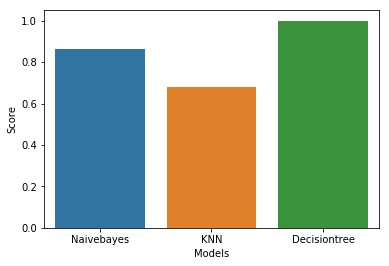

In [56]:
sns.barplot(x=final_score["Models"],y=final_score["Score"],data=final_score)